<a href="https://colab.research.google.com/github/ArielleKann/Arielle_Kann/blob/master/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data that I am using was obtained in a survey of students math and portuguese language courses in secondary school. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

column_names = [ 'school' , 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guatdian', 'traveltime', 'studytime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


df = pd.read_csv("https://raw.githubusercontent.com/ArielleKann/Data/main/student-mat.csv")

df = df.drop(0)

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 1 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      394 non-null    object
 1   sex         394 non-null    object
 2   age         394 non-null    int64 
 3   address     394 non-null    object
 4   famsize     394 non-null    object
 5   Pstatus     394 non-null    object
 6   Medu        394 non-null    int64 
 7   Fedu        394 non-null    int64 
 8   Mjob        394 non-null    object
 9   Fjob        394 non-null    object
 10  reason      394 non-null    object
 11  guardian    394 non-null    object
 12  traveltime  394 non-null    int64 
 13  studytime   394 non-null    int64 
 14  failures    394 non-null    int64 
 15  schoolsup   394 non-null    object
 16  famsup      394 non-null    object
 17  paid        394 non-null    object
 18  activities  394 non-null    object
 19  nursery     394 non-null    object
 20  higher    

Dropped the irrelevant columns.
The first 5 rows of data.

In [ ]:
df = df.drop(['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
df.head(5)

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,F,17,T,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,F,15,T,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,F,15,T,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,F,16,T,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,M,16,T,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


The last 5 rows of data.

In [ ]:
df.tail(5)


,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,M,20,A,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,M,17,T,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,M,21,T,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,M,18,T,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10
394,M,19,T,1,1,1,1,0,3,2,3,3,3,5,5,8,9,9


Counts the amount of rows there are. 

In [ ]:
df.count()


sex           394
age           394
Pstatus       394
Medu          394
Fedu          394
traveltime    394
studytime     394
failures      394
famrel        394
freetime      394
goout         394
Dalc          394
Walc          394
health        394
absences      394
G1            394
G2            394
G3            394
dtype: int64

Dropped the duplicate rows and shows the first 5 rows of data. 

In [ ]:
df=df.drop_duplicates()
df.head(5)

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,F,17,T,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,F,15,T,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,F,15,T,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,F,16,T,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,M,16,T,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


Dropped the missing or null values.
There is no null values or missing values.

In [ ]:
print(df.isnull().sum())

sex           0
age           0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


After dropping the missing values.
The number of lines stays the same since nothing got dropped. 

In [ ]:
df=df.dropna()
df.count()

sex           394
age           394
Pstatus       394
Medu          394
Fedu          394
traveltime    394
studytime     394
failures      394
famrel        394
freetime      394
goout         394
Dalc          394
Walc          394
health        394
absences      394
G1            394
G2            394
G3            394
dtype: int64

After dropping the values.
The number stays the same since nothing got dropped. 

In [ ]:
print(df.isnull().sum())

sex           0
age           0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Detecting the outliers
(there is one outlier for age).
The age is basically between 16 and 18 with one outlier that is 22. 

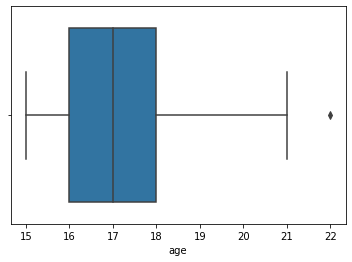

In [ ]:
sns.boxplot(x=df['age']) 

There is one outlier for freetime. That outlier is only 1 hour of freetime while everyone else had between 3 and 4 hours of freetime. 

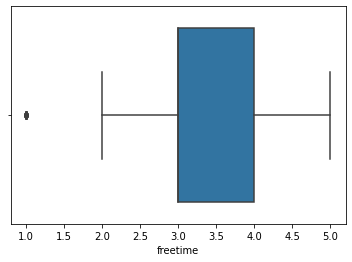

In [ ]:
sns.boxplot(x=df['freetime'])

There is 13 outliers for absences. There was a lot of children that had absences above the average amount of between 0 and 8. 

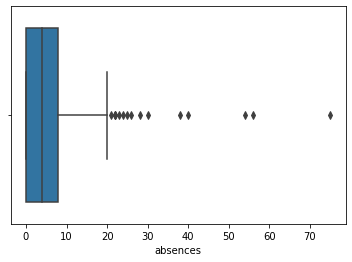

In [ ]:
sns.boxplot(x=df['absences'])

In [ ]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
print(IQR)

age           2.0
Medu          2.0
Fedu          1.0
traveltime    1.0
studytime     1.0
failures      0.0
famrel        1.0
freetime      1.0
goout         2.0
Dalc          1.0
Walc          2.0
health        2.0
absences      8.0
G1            5.0
G2            4.0
G3            6.0
dtype: float64


In [ ]:
df=df[~((df<(Q1 -1.5 * IQR))|(df>(Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(231, 18)

Histogram. Kids age and failure of class. Does age have to do with class failures?
The older the kids got the less failures there was. 

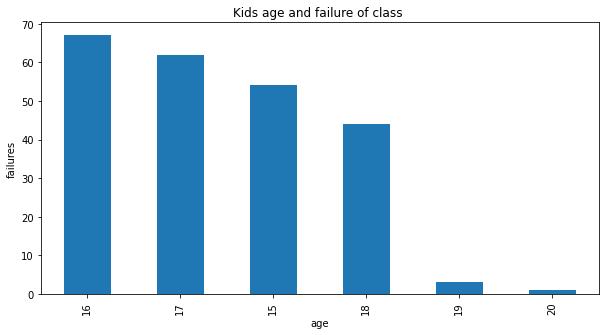

In [ ]:
df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Kids age and failure of class ")
plt.ylabel('failures')
plt.xlabel('age');


Heat map which helps to find the dependent variables. 
Is health the reason for absence?
It is only the reason for -0.046% of the absences. 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.120303,-0.137541,0.193153,0.145908,NaN,0.007074,-0.069113,0.184266,0.106755,0.153016,-0.109873,0.202745,-0.046773,-0.155020,-0.176476
Medu,-0.120303,1.000000,0.601670,-0.162742,0.078573,NaN,0.130979,0.051618,0.067215,0.030459,-0.005047,0.059525,0.040782,0.181600,0.196286,0.211442
Fedu,-0.137541,0.601670,1.000000,-0.101839,-0.000699,NaN,0.067522,0.013650,0.037896,0.009241,0.035706,0.108865,-0.057813,0.187432,0.205334,0.202967
traveltime,0.193153,-0.162742,-0.101839,1.000000,-0.092822,NaN,-0.023918,-0.034542,-0.060235,0.023513,0.042578,-0.059471,-0.023689,0.017882,-0.026189,-0.026439
studytime,0.145908,0.078573,-0.000699,-0.092822,1.000000,NaN,0.091860,-0.081147,0.084492,-0.147734,-0.177747,-0.056260,-0.090303,0.076413,0.041740,0.034994
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famrel,0.007074,0.130979,0.067522,-0.023918,0.091860,NaN,1.000000,0.079207,0.009613,-0.128605,-0.203511,0.043010,-0.140584,0.027702,0.074552,0.102719
freetime,-0.069113,0.051618,0.013650,-0.034542,-0.081147,NaN,0.079207,1.000000,0.161546,0.093559,0.042538,0.004764,0.053243,0.054888,0.054402,0.058225
goout,0.184266,0.067215,0.037896,-0.060235,0.084492,NaN,0.009613,0.161546,1.000000,0.161083,0.323687,-0.101798,0.102208,-0.005209,-0.055225,-0.042039
Dalc,0.106755,0.030459,0.009241,0.023513,-0.147734,NaN,-0.128605,0.093559,0.161083,1.000000,0.553492,0.080917,-0.027068,-0.094399,-0.068661,-0.073856


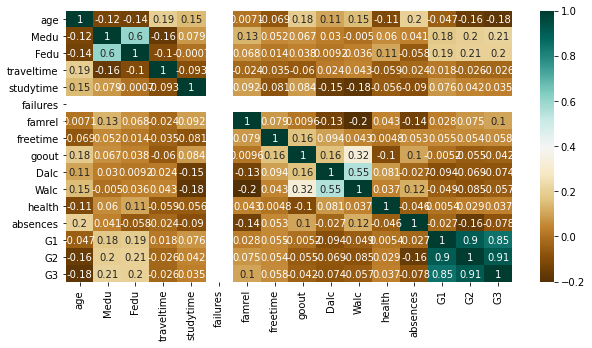

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c


Scatterplot. The amount of studytime against the absences of children in secondary school. 

Does the absences effect studytime? 
I want to say that it does but since it looks like the results are unidentified. 

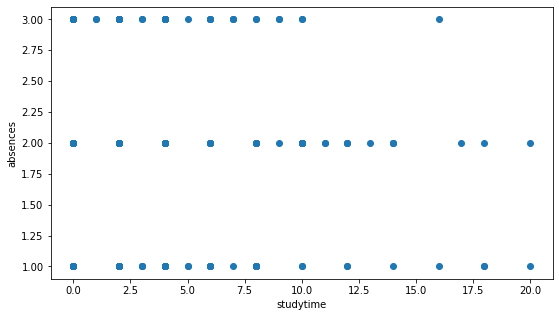

In [ ]:
fig, ax=plt.subplots(figsize=(9,5))
ax.scatter(df['absences'], df['studytime'])
ax.set_xlabel('studytime')
ax.set_ylabel('absences')
plt.show()
